# Приоритизация гипотез и анализ А/В-теста

**Контекст**

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. 

**Описание данных**

*Данные для приоритизации гипотез*

Файл /datasets/hypothesis.csv
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

*Данные для анализа A/B-теста*

Файл /datasets/orders.csv
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
import scipy.stats as stats

### Приоритизация гипотез

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
pd.options.display.max_colwidth = 130
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [3]:
hypothesis['Hypothesis'].unique()

array(['Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей',
       'Запустить собственную службу доставки, что сократит срок доставки заказов',
       'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа',
       'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар',
       'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей',
       'Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов',
       'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию',
       'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок',
       'Запустить акцию, дающую скидку на товар в день рождения'],
      dtype=object)

In [4]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Пропусков и дубликатов нет.

Поменяем в названиях столбцов верхний на нижний регистр, чтобы в далнейшем было удобно работать с данными.

In [5]:
hypothesis.columns = hypothesis.columns.str.lower()

**Применение фреймворка ICE для приоритизации гипотез**

In [6]:
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']).round(2)

In [7]:
hypothesis_ice = hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)
hypothesis_ice

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


**Применение фреймворка RICE для приоритизации гипотез**

In [8]:
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

In [9]:
hypothesis_rice = hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)
hypothesis_rice

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Топ-5 гипотез по фреймворку ICE (после топ-5 идет сильный разрыв по показателю):
1. Запустить акцию, дающую скидку на товар в день рождения
2. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
3. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
4. Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
5. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа

Топ-5 гипотез по фреймворку RICE такие же, только в другом порядке, из-за добавления параметра 'Reach'(скольких пользователей затронет изменение, которое вы хотите внести). 

'Запустить акцию, дающую скидку на товар в день рождения' - Reach = 1 => значение показателя не меняется.

'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок' - Reach = 10(макс. значение) => становится первой гипотезой по приоретету по фреймворку RICE, так как изменения охватят большинство пользователей.

### Анализ A/B-теста

Проведен A/B-тест и получены результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv

Для начала изучим данные в этих файлах.

In [10]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [11]:
orders.head(10)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


In [12]:
visitors.head(10)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


In [13]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [14]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Посмотрим на наличие дубликатов. Спойлер: их нет.

In [15]:
display(orders.duplicated().sum())
display(visitors.duplicated().sum())

0

0

Теперь посмотрим совпадают ли минимальная и максимальная даты в двух файлах.

In [16]:
#дата начала теста
display(orders['date'].min())
display(visitors['date'].min())

'2019-08-01'

'2019-08-01'

In [17]:
#дата окончания теста
display(orders['date'].max())
display(visitors['date'].max())

'2019-08-31'

'2019-08-31'

Даты начала и окончания теста совпадают.

Также проверим количество групп. Спойлер: количество групп и их названия совпадают.

In [18]:
display(orders['group'].unique())
display(visitors['group'].unique())

array(['B', 'A'], dtype=object)

array(['A', 'B'], dtype=object)

Посмотрим на распределение количества уникальных пользователей.

In [19]:
display(orders.groupby('group').agg({'visitorId':'nunique'}))

,visitorId
group,
A,503
B,586


Количество уникальных пользователей по группам различаются. В группе B на 83 пользователя больше. Один из успешных критериев А/А теста - количество пользователей в различных группах различается не более, чем на 1%. В данном случае этот критерий не выполняется.

Также стоит проверить, не попадают ли пользователи в обе группы. Для этого создадим таблицу с таблцами 'visitorId' и 'group', удалим дубликаты, и после этого посчитаем сколько осталось дубликатов'visitorId'.

In [20]:
visitors_bothgroups = orders[['visitorId', 'group']].drop_duplicates()
visitors_bothgroups.head(5)

,visitorId,group
0,3312258926,B
1,3642806036,B
2,4069496402,A
3,1196621759,B
4,2322279887,B


In [21]:
visitors_bothgroups['visitorId'].duplicated().sum()

58

58 пользователей находятся в обеих группах.

**График кумулятивной выручки по группам**

In [22]:
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()

In [23]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date', 'group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]



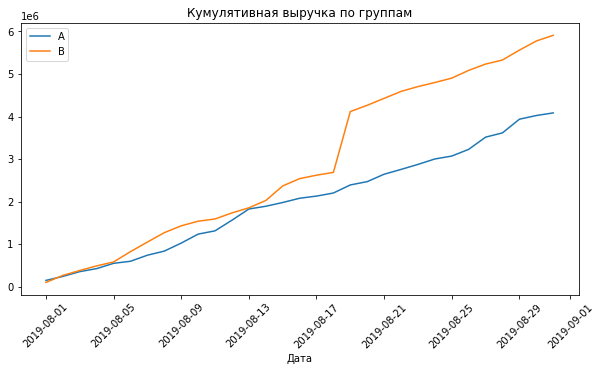

In [24]:
plt.figure(figsize =(10,5))
plt.title('Кумулятивная выручка по группам')
plt.xticks(rotation=45)
plt.xlabel('Дата')

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()
plt.show()

Вывод: выручка двух групп почти равномерно увеличивалась до 18 августа 2019, однако после этого выручка группы B резко выросла. Это может сигнализировать о всплесках числа заказов или о появлении очень дорогих заказов в данной группе. 

**График кумулятивного среднего чека по группам**

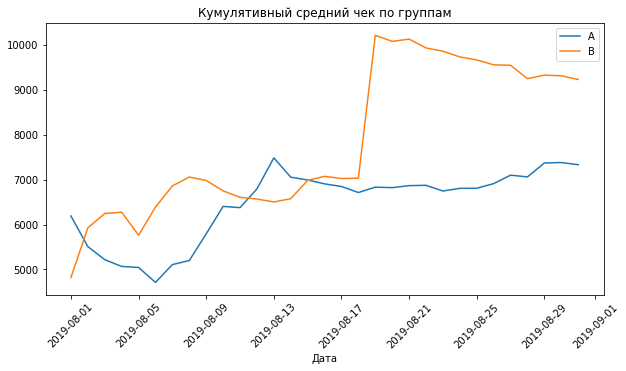

In [25]:
plt.figure(figsize =(10,5))
plt.title('Кумулятивный средний чек по группам')
plt.xticks(rotation=45)
plt.xlabel('Дата')

# разделим кумулятивную выручку на кумулятивное число заказов в двух группах
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.legend()
plt.show()

Вывод: на данном графике, как и на прошлом, можно заметить, что 18 августа значение среднего чека сильно выросло в группе B. Возможные причины упоминались ранее: всплеск числа заказов или появление очень дорогих заказов в данной группе.

В группе А значение показателя сильно снизилось 6 августа(меньшее количество заказов или "мелкие" заказы), а 13 августа достигло своего максимума, обогнав группу B. Позже данный показатель стабилен. 

**График относительного изменения кумулятивного среднего чека группы B к группе A**

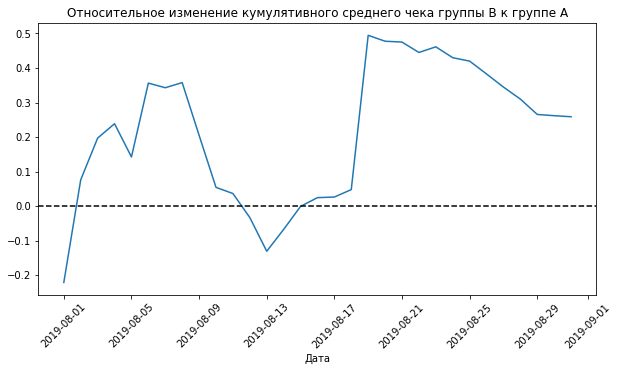

In [26]:
plt.figure(figsize =(10,5))
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.xticks(rotation=45)
plt.xlabel('Дата')

# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.show()

Вывод: В период со 2 по 10 августа - первый скачок показателя отношения средних чеков, с 18 августа - второй. Как мы видели ранее, действительно в эти периоды и выручка у группы В превышает выручку группы А.

**График кумулятивного среднего количества заказов на посетителя по группам**

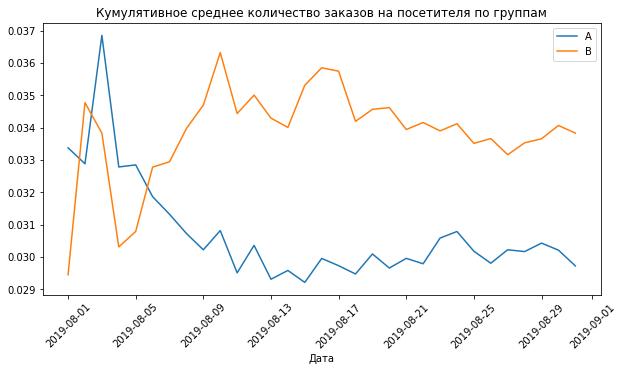

In [27]:
plt.figure(figsize =(10,5))
plt.title('Кумулятивное среднее количество заказов на посетителя по группам')
plt.xticks(rotation=45)
plt.xlabel('Дата')

# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.show()

Вывод: До 6 августа значение кумулятивного среднего количества заказов на посетителя у группы B было ниже. 6 августа значения сравнялись, и, после этого, группа В обогнала группу А по данному показателю. С 10 августа у обеих групп показатель стабилизировался.

**График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A**

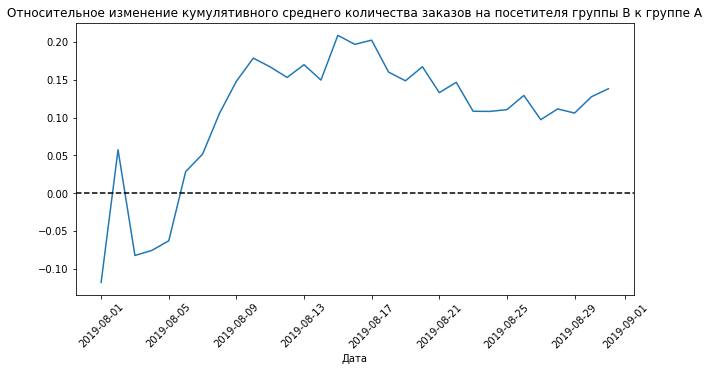

In [28]:
plt.figure(figsize =(10,5))
plt.title('Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xticks(rotation=45)
plt.xlabel('Дата')

mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.show()

Вывод: Данный график подтверждает, что после 6 августа группа В выигрывает группу А по кумулятивному среднему количеству заказов на одного посетителя. 15 августа разрыв составил больше 20%.

**Точечный график количества заказов по пользователям**

Для начала необходимо посчитать количество заказов по пользователям.

In [29]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['visitorId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10)) 

       visitorId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


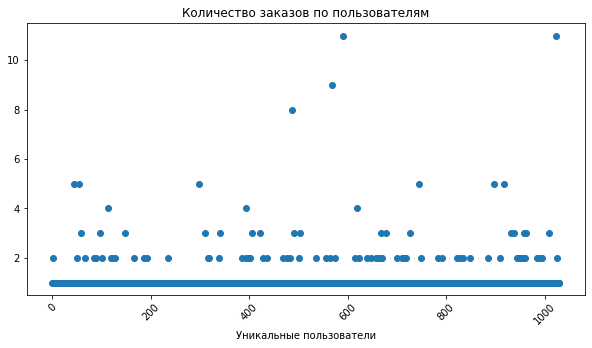

In [30]:
plt.figure(figsize =(10,5))
plt.title('Количество заказов по пользователям')
plt.xticks(rotation=45)
plt.xlabel('Уникальные пользователи')

x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'])
plt.show()

Вывод: Можно увидеть, что в основном пользователь оформляет 1 заказ, 2 заказа оформляют горазда реже. 

Чтобы выяснить, что является аномалией, необходимо посчитать выборочные перцентили количества заказов на одного пользователя.

**95-й и 99-й перцентили количества заказов на пользователя. Граница для определения аномальных пользователей**

In [31]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


Вывод: Не более 5% пользователей оформляли больше 2 заказов, и не более 1% - больше 4 заказов. Пусть верхняя граница числа заказов будет 4, а все что больше данного числа станет аномалией.

**Точечный график стоимостей заказов**

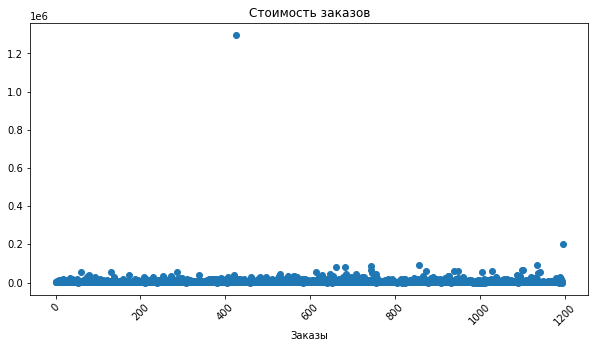

In [32]:
plt.figure(figsize =(10,5))
plt.title('Стоимость заказов')
plt.xticks(rotation=45)
plt.xlabel('Заказы')

x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.show()

Вывод: На данном графике видно, что в основном стоимость заказа ниже 200000 ден. ед. Все, что выше - аномалии. Чтобы в этом убедиться посчитаем перцентили.

Для большей наглядности построим точечный график без аномалий, чтобы рассмотреть основную часть заказов

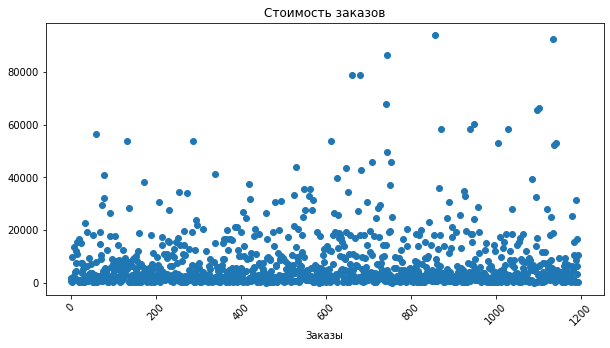

In [33]:
plt.figure(figsize =(10,5))
plt.title('Стоимость заказов')
plt.xticks(rotation=45)
plt.xlabel('Заказы')

x_values = pd.Series(range(0,len(orders[orders['revenue'] < 200000]['revenue'])))
plt.scatter(x_values, orders[orders['revenue'] < 200000]['revenue'])
plt.show()

**95-й и 99-й перцентили стоимости заказов. Граница для определения аномальных заказов**

In [34]:
print(np.percentile(orders['revenue'], [95, 99])) 

[28000.  58233.2]


Вывод: Не более 5% пользователей оформляют заказ больше 28 000 ден. ед. Не более 1 % пользователей - больше 58233,2 ден. ед. Верхняя граница стоимости заказов будет 58233.2 ден. ед, поскольку мы фильтруем данные по двум параметрам.

**Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным**

H0: различий в среднем количестве заказов между группами нет. 

H1: различия в среднем между группами есть.

Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['visitorId', 'transactionId']. В них, для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 

In [35]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders'] 

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

In [36]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visitors.groupby('group').agg({'visitors': 'sum'}).visitors[0] - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visitors.groupby('group').agg({'visitors': 'sum'}).visitors[1] - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [37]:
print('P-value равен',"{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Различие между группами равняется',"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

P-value равен 0.017
Различие между группами равняется 0.138


Вывод: p-value = 0.017 - меньше уровня значимости (0,05),следовательно группы различны. H0 отвергается.

Среднее количество заказов на посетителя группы В выше на 13,8% группы А.

**Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным**

H0: различий в среднем чеке между группами нет. 

H1: различия в среднем чеке между группами есть. 

In [38]:
print('P-value равен','{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Различие между группами равняется','{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

P-value равен 0.729
Различие между группами равняется 0.259


Вывод: p-value = 0.729 - больше уровня значимости (0.05),следовательно группы не имеют различия. H0 не отвергается.

Средний чек группы В выше на 25,9%. Но поскольку значение p-value такое большое, то наблюдаемое различие между группами не является значимым.

**Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным**

Для начала узнаем, сколько всего аномальных пользователей. Это те, кто совершил более 2 заказов или заплатил за заказ более 28000 ден.ед.

In [39]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['orders'], 99)]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsers['orders'], 99)]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], 99)]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0]) 

1099     148427295
949      887908475
744      888512513
1103    1164614297
1136    1307669133
dtype: int64
15


15 аномальных пользователей. Узнаем, как их действия повлияли на результаты теста с помощью критерия Манна-Уитни.

In [40]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors.groupby('group').agg({'visitors': 'sum'}).visitors[0] - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
            visitors.groupby('group').agg({'visitors': 'sum'}).visitors[1] - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

print('P-value равен','{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Различие между группами равняется','{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

P-value равен 0.014
Различие между группами равняется 0.153


Вывод: p-value = 0.014 - меньше уровня значимости (0.05), следовательно группы различны. H0 отвергается.

После очистки данных среднее количество заказов на посетителя группы В выше на 15,3% группы А. Этот показатель выше по сравнению с сырыми данными.

**Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным**

In [41]:
print(
    'P-value равен','{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    'Различие между группами равняется',"{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

P-value равен 0.851
Различие между группами равняется -0.006


Вывод: p-value = 0.851 - больше уровня значимости (0.05), следовательно группы не имеют различий, как и в случае с сырыми данными. H0 не отвергается.

Однако в данном случае группа А выигрывает у группы В по среднему чеку на 0,6%. С сырыми данными это значение равнялось 25.9%,  и группа В выиграла. После очистки данных разница в среднем чеке стала минимальной.

### Вывод

**Приоритизация гипотез по ICE, RICE**

Топ-5 гипотез по фреймворку ICE (после топ-5 идет сильный разрыв по показателю):

- Запустить акцию, дающую скидку на товар в день рождения
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа

Топ-5 гипотез по фреймворку RICE такие же, только в другом порядке, из-за добавления параметра 'Reach'(скольких пользователей затронет изменение, которое вы хотите внести).

- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
- Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
- Запустить акцию, дающую скидку на товар в день рождения

'Запустить акцию, дающую скидку на товар в день рождения' - Reach = 1 => значение показателя не меняется.

'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок' - Reach = 10(макс. значение) => становится первой гипотезой по приоретету по фреймворку RICE, так как изменения охватят большинство пользователей.

**Анализ A/B-теста**

Проведен A/B-тест и получены результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv:
- Дубликатов нет 
- Даты начала(2019-08-01) и окончания теста(2019-08-31) совпадают
- Количество уникальных пользователей по группам различаются. В группе B на 83 пользователя больше. Один из успешных критериев А/А теста - количество пользователей в различных группах различается не более, чем на 1%. В данном случае этот критерий не выполняется
- 58 пользователей находятся в обеих группах

*График кумулятивной выручки по группам:* выручка двух групп почти равномерно увеличивалась до 18 августа 2019, однако после этого выручка группы B резко выросла. 

*График кумулятивного среднего чека по группам* также показывает, что 18 августа значение среднего чека сильно выросло в группе B. Это может сигнализировать о всплесках числа заказов или о появлении очень дорогих заказов в данной группе.
*График относительного изменения кумулятивного среднего чека группы B к группе A:* В период со 2 по 10 августа - первый скачок показателя отношения средних чеков, с 18 августа - второй(больше, чем первый). В эти периоды и выручка у группы В превышает выручку группы А.

*График кумулятивного среднего количества заказов на посетителя по группам:* До 6 августа значение кумулятивного среднего количества заказов на посетителя у группы B было ниже. 6 августа значения сравнялись, и, после этого, группа В обогнала группу А по данному показателю. С 10 августа у обеих групп показатель стабилизировался. Скорее всего группа В совершила такой скачок по показателям из-за резкого увеличения числа заказов. 
*График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A:* После 6 августа группа В выигрывает группу А по кумулятивному среднему количеству заказов на одного посетителя. 15 августа разрыв составил больше 20%.

*Точечный график количества заказов по пользователям:* В основном, пользователь оформляет 1 заказ, 2 заказа оформляют горазда реже.
*Точечный график стоимостей заказов:* Стоимость заказа ниже 200000 ден. ед. Все, что выше - аномалии. Чтобы в этом убедиться посчитаем перцентили.

После подсчета выборочных перцентилей количества заказов на одного пользователя *определили аномальных пользователей:* те, кто совершил более 2 заказов или заплатил за заказ более 28000 ден.ед. Таких пользователей - 15.

*Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным:* После проверки гипотезы выяснилось что группы различны в среднем количестве заказов на посетителя. Среднее количество заказов на посетителя группы В выше на 13,8% группы А.

*Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным:* Группы не имеют различий. Средний чек группы В выше на 25,9%.Но поскольку значение p-value такое большое, то наблюдаемое различие между группами не является значимым.

*Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным:*
Группы различны. После очистки данных среднее количество заказов на посетителя группы В выше на 15,3% группы А. Этот показатель выше по сравнению с сырыми данными.

*Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным:*
Группы не имеют различий, как и в случае с сырыми данными. Однако в данном случае группа А выигрывает у группы В по среднему чеку на 0,6%. С сырыми данными это значение равнялось 25.9%, и группа В выиграла. После очистки данных разница в среднем чеке стала минимальной.

**Решение по результатам теста:**
Остановить тест, зафиксировать победу группы В, поскольку и до очистки данных, и после них данная группа выигрывает по показателю в среднем количестве заказов на посетителя между группами. А по показателю "средний чек заказа между группами" группы не имеют различий после проверки гипотез.
